# **Downloading Datasets**

---
Datasets yang digunakan dari kaggle berasal dari CARLA simulator yang di generated oleh Lyft Udacity Challenge. Datasets dapat digunakan untuk machine learning terutama segmentasi mobil, jalan dan lain-lain pada gambar

Datasets terdiri dari 5 folder yang berisi 1000 gambar dan labelnya

---
### **Content**

Dataset terdiri dari nilai RGB dan label segmen

---
### **Datasets Link**  
- [Carla](http://carla.org/) 
- [Kaggle](https://www.kaggle.com/kumaresanmanickavelu/lyft-udacity-challenge)
- [Github](https://github.com/ongchinkiat/LyftPerceptionChallenge/releases/download/v0.1/carla-capture-20180513A.zip)
- [Carla label](https://carla.readthedocs.io/en/latest/cameras_and_sensors/#sensorcamerasemantic_segmentation)

---




Code dibawah untuk mendownload dari kaggle dengan JSON Kaggle API untuk mendownload 

In [ ]:
!nvidia-smi -L
! pip install -q kaggle             #install pip kaggle

from google.colab import files      #upload file kaggle API
files.upload()

! mkdir ~/.kaggle                                                               #Pembuatan directory
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list                                                          #Pengecekan
! kaggle datasets download -d kumaresanmanickavelu/lyft-udacity-challenge       #Download berdasar API datasets
! mkdir train                                                                   #Pembuatan directory
! unzip /content/lyft-udacity-challenge.zip -d /content/train 
! mkdir prediction                  #Unzip file ke folder train

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp -r '/content/prediction/.' '/content/drive/MyDrive/Image-data-png-prediction'



---




# **Datasets Representation**

Datasets yang tersedia menyediakan dua kelompok data, data kelompok pertama merupakan data training RGB dan data kelompok kedua merupakan *ground truth*.
Resolusi gambar sendiri berukuran 600x800 dengan jenis file **PNG**



In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

training_RGB = cv2.imread('/content/train/dataA/dataA/CameraRGB/02_00_000.png')
ground_truth = cv2.imread('/content/train/dataA/dataA/CameraSeg/02_00_000.png') 
ground_truth = np.array([max(ground_truth[i, j]) for i in range(ground_truth.shape[0]) for j in range(ground_truth.shape[1])]).reshape(training_RGB.shape[0], training_RGB.shape[1])
height, width, layer = training_RGB.shape
print('image size:'+str(height)+'x'+str(width))
fig, imageRow = plt.subplots(1,2, figsize=(15, 11))
imageRow[0].set_title('Real Image')
imageRow[0].imshow(training_RGB)
imageRow[1].set_title('Ground truth')
imageRow[1].imshow(ground_truth)


AttributeError: ignored



---


Sedangkan dalam kodingan ini, ingin dicari data road. Pada link [Carla label](https://carla.readthedocs.io/en/latest/ref_sensors/#sensorcamerasemantic_segmentation) terdapat tabel **"tag"** untuk merepresentasikan nilai yang muncul. Untuk **"Road"** nilai tag-nya adalah 7

In [ ]:
from PIL import Image as im
Carla_Tag = 7
road = np.zeros((600, 800))
road[np.where(ground_truth==Carla_Tag)[0], np.where(ground_truth==Carla_Tag)[1]]=255
data = im.fromarray(road)
fig, imageRow = plt.subplots(1,2, figsize=(15, 11))
imageRow[0].set_title('Carla Tag')
imageRow[0].imshow(road)
imageRow[1].set_title('Black and White')
imageRow[1].imshow(data)

# **Balancing Data**
Agar tidak terjadi bias terhadap data yang akan dimasukkan pada machine learning, maka data harus dilihat terlebih dahulu keberagamannya. 
Path data-data tersebut disimpan di dalam file .*txt*

In [ ]:
import os
import numpy as np
from os import walk

print(os.listdir("/content/train"))
train_folder = "/content/train"
CameraRGB = []
CameraSeg =[]
img_folder = 'CameraRGB'
label_folder = 'CameraSeg'
for dirpath, dirnames, filenames in walk(train_folder):
  for files in filenames:
    path = os.path.join(dirpath, files)
    path_dir = path.split(os.path.sep)
    if str(path_dir[5])==img_folder:
      CameraRGB.append(path)
    else:
      CameraSeg.append(path)
print(CameraRGB)

['datab', 'dataA', 'dataE', 'datac', 'dataB', 'datad', 'datae', 'dataC', 'dataD', 'dataa']
['/content/train/datab/dataB/CameraRGB/F5-2.png', '/content/train/datab/dataB/CameraRGB/F3-63.png', '/content/train/datab/dataB/CameraRGB/F9-72.png', '/content/train/datab/dataB/CameraRGB/05_00_052.png', '/content/train/datab/dataB/CameraRGB/F4-63.png', '/content/train/datab/dataB/CameraRGB/07_00_192.png', '/content/train/datab/dataB/CameraRGB/05_00_152.png', '/content/train/datab/dataB/CameraRGB/03_00_073.png', '/content/train/datab/dataB/CameraRGB/05_00_013.png', '/content/train/datab/dataB/CameraRGB/F61-62.png', '/content/train/datab/dataB/CameraRGB/08_00_142.png', '/content/train/datab/dataB/CameraRGB/08_00_243.png', '/content/train/datab/dataB/CameraRGB/03_00_152.png', '/content/train/datab/dataB/CameraRGB/F6-33.png', '/content/train/datab/dataB/CameraRGB/05_00_172.png', '/content/train/datab/dataB/CameraRGB/02_00_233.png', '/content/train/datab/dataB/CameraRGB/F67-73.png', '/content/train/d

In [ ]:
"""
Proses dibawah untuk menyimpan file path
"""
file2write=open("Train_image.txt",'a')
for index in CameraRGB:
  file2write.write(index)
  file2write.write('\n')
file2write.close()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os

"""
Membaca path pada masing-masing line
"""

results =[]
with open("Train_image.txt") as f:
    for line in f :
        line = line.strip()
        data = line.split(" ")
        results.append(data)

hist_val =[]
hist_bin =[]
for data in results:
  path_dir = data[0].split(os.path.sep)
  if len(path_dir[6]) > 11:
    files_name = path_dir[6][:5]
  else:
    files_name = path_dir[6][:3]
  hist_val.append(path_dir[3]+"/"+path_dir[4]+"/"+path_dir[5]+"/"+files_name)

count=[]
for data in hist_val:
  if data not in count:
    hist_bin.append(data)
    count.append(data)
list_count = {i:hist_val.count(i) for i in hist_val}
print("   Data Path \t     Count File")
# for data in list_count:
#   print("%s \t %d"% ( data, list_count[data]))

   Data Path 	     Count File


Pada hasil pembacaan diatas, ternyata data tersebut memiliki perbedaan pada beberapa banyak frame dalam satu sequence. Maka dari itu, beberapa gambar dihilangkan agar memiliki jumlah frame sequence gambar yang sama. Semua frame gambar akan dibatasi menjadi 7 dengan mempertimbangkan total dataset untuk training.

In [ ]:
results_data=[]
for path in hist_bin:
  count_index=0
  #print(path)
  for data in results:
    #print(data[0])
    if path in data[0] and count_index < 7:
      results_data.append(data[0])
      count_index += 1

print(results_data)

In [ ]:
file2write=open("Train_image_reduce.txt",'a')
for index in results_data:
  #print(index)
  file2write.write(index)
  file2write.write('\n')
file2write.close()

In [ ]:
data_value =[]
with open("Train_image_reduce.txt") as f:
    for line in f :
        line = line.strip()
        data = line.split(" ")
        data_value.append(data[0])

hist_val =[]
hist_bin =[]
for data in data_value:
  path_dir = data.split(os.path.sep)
  if len(path_dir[6]) > 11:
    files_name = path_dir[6][:5]
  else:
    files_name = path_dir[6][:3]
  hist_val.append(path_dir[3]+"/"+path_dir[4]+"/"+path_dir[5]+"/"+files_name)

count=[]
for data in hist_val:
  if data not in count:
    hist_bin.append(data)
    count.append(data)
list_count = {i:hist_val.count(i) for i in hist_val}
print("   Data Path \t\t     Count File")
for data in list_count:
  print("%s \t %d"% ( data, list_count[data]))

   Data Path 		     Count File
datab/dataB/CameraRGB/F5- 	 7
datab/dataB/CameraRGB/F3- 	 7
datab/dataB/CameraRGB/F9- 	 7
datab/dataB/CameraRGB/05_00 	 7
datab/dataB/CameraRGB/F4- 	 7
datab/dataB/CameraRGB/07_00 	 7
datab/dataB/CameraRGB/03_00 	 7
datab/dataB/CameraRGB/F61 	 7
datab/dataB/CameraRGB/08_00 	 7
datab/dataB/CameraRGB/F6- 	 7
datab/dataB/CameraRGB/02_00 	 7
datab/dataB/CameraRGB/F67 	 7
datab/dataB/CameraRGB/02_02 	 7
datab/dataB/CameraRGB/F7- 	 7
datab/dataB/CameraRGB/F65 	 7
datab/dataB/CameraRGB/06_00 	 7
datab/dataB/CameraRGB/04_00 	 7
datab/dataB/CameraRGB/F69 	 7
datab/dataB/CameraRGB/F2- 	 7
datab/dataB/CameraRGB/03_01 	 7
datab/dataB/CameraRGB/10_00 	 7
datab/dataB/CameraRGB/F63 	 7
datab/dataB/CameraRGB/02_01 	 7
datab/dataB/CameraRGB/F1- 	 7
datab/dataB/CameraRGB/09_00 	 7
datab/dataB/CameraRGB/F64 	 7
datab/dataB/CameraRGB/F70 	 7
datab/dataB/CameraRGB/F68 	 7
datab/dataB/CameraRGB/F8- 	 7
datab/dataB/CameraRGB/F62 	 7
datab/dataB/CameraRGB/F66 	 7
datab/dataB/Cam

# **Data manipulation**

In [ ]:
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random
from tqdm import tqdm

## **Training, Validation dan Testing Split**
Membagi dataset menjadi data training dan testing. Pembagian dataset dibuat secara random, dengan pembagian dataset untuk Testing, Training, Validation

In [ ]:
# import os
# from sklearn.model_selection import train_test_split
X=[]
y=[]
height, width = 600,800
with open("Train_image_reduce.txt") as f:
    for line in f :
        line = line.strip()
        data = line.split(" ")
        X.append(data[0])
        path_dir = data[0].split(os.path.sep)
        y.append(os.path.join("/",path_dir[0],path_dir[1],path_dir[2],path_dir[3],path_dir[4],"CameraSeg",path_dir[6]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
print("Sample Training\t: %d \nSample Testing\t: %s\nSample Valid\t: %s" % (len(X_train), len(X_test), len(X_valid)))

Sample Training	: 1200 
Sample Testing	: 448
Sample Valid	: 592


## **Preprocessing Image**
Mengubah gambar menjadi RGB karena dibuka menggunakan dan akan digunakan dalam library.

In [ ]:
# import matplotlib.pyplot as plt
# import cv2
# import numpy as np

def img_preprocess(img,label):
  label = np.array([max(label[i, j]) for i in range(label.shape[0]) for j in range(label.shape[1])]).reshape(img.shape[0], img.shape[1])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  height, width, layer = img.shape
  Carla_Tag = 7
  road = np.zeros((height, width), dtype=np.int8)
  road[np.where(label==Carla_Tag)[0], np.where(label==Carla_Tag)[1]]=1
  return img, road

## **Batch Generator**

In [ ]:
# import random
# from tqdm import tqdm
# import os
def batch_generator(image_paths, label_paths):

  batch_img = []
  batch_label = []
  batch_address = []
  
  for i in tqdm(range(len(image_paths))):

    label = cv2.imread(label_paths[i])
    img = cv2.imread(image_paths[i])
    images, maskes = img_preprocess(img, label)    

    batch_img.append(images)
    batch_label.append(maskes)
    batch_address.append( image_paths[i])
  return (np.asarray(batch_img), np.asarray(batch_label), np.asarray(batch_address))

# **MAIN**

## **DATA TRAINING**



### **LIST SAMPLE UNTUK TRAINING**
Melakukan import untuk menjalankan python sesuai yang dibutuhkan


In [ ]:
import numpy as np
images = np.zeros((len(X_train), height, width, 3), dtype=np.int16)
masks = np.zeros((len(y_train), height, width, 1), dtype=np.int8)

images, masks = batch_generator(X_train, y_train)
X_train = images
y_train = masks

images, masks = batch_generator(X_valid, y_valid)
X_valid = images
y_valid = masks

### **U-NET PEMODELAN**

In [ ]:
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate 
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import cv2
import numpy as np


input_img = Input((height, width, 3), name='img')

c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (input_img)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)

u5 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c4)
u5 = concatenate([u5, c3])
c6 = Conv2D(32, (3, 3), activation='relu', padding='same') (u5)
c6 = Conv2D(32, (3, 3), activation='relu', padding='same') (c6)

u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c2])
c7 = Conv2D(16, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(16, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c1])
c8 = Conv2D(8, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(8, (3, 3), activation='relu', padding='same') (c8)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c8)


model = Model(inputs=[input_img], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy') 
model.summary()

callbacks = [
              EarlyStopping(patience=12, verbose=1),
              ReduceLROnPlateau(patience=3, verbose=1),
              ModelCheckpoint('temp-model-seg.h5', verbose=1, save_best_only=True)
]

results = model.fit(X_train, y_train, batch_size=16,
                    epochs=100,
                    callbacks=callbacks,
                     validation_data=(X_valid, y_valid))

model.save('seg-road-model.h5')

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

# **TEST SAMPLING**

In [ ]:
images, masks, address = batch_generator(X_test, y_test)
X_test = images
y_test = masks

## **PREDIKSI TEST**

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.models import Model, load_model

dirpath = "/content/tesPredict"
model = load_model('/content/ep51_seg-road-model.h5')
#masks = np.zeros((len(y_train), height, width, 1), dtype=np.int8)

for i in tqdm(range(len(address))):
  masks = model.predict(np.expand_dims(X_test[i], 0))
  my_preds = masks.flatten()
  my_preds = np.array([1 if i >= 0.5 else 0 for i in my_preds])


  im =  Image.fromarray((my_preds * 255).astype(np.uint8).reshape(600, 800))
  path = address[i].split(os.path.sep)
  im.save('/content/prediction/'+path[3]+'()'+path[4]+'()'+path[5]+'()'+path[6])



## **IMAGE SHOW PREDICTION DAN GROUND TRUTH**

image size:600x800
this road 1
this predict 255


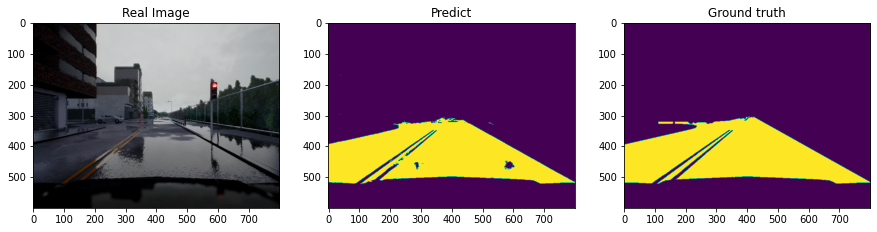

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

file_name='/content/prediction/dataA()dataA()CameraRGB()02_00_051.png'
predict_truth = cv2.imread(file_name) 

a = file_name.split(os.path.sep)
b = a[3].split('()')
training_RGB = cv2.imread('/content/train/'+b[0]+'/'+b[1]+'/'+b[2]+'/'+b[3]) 
training_RGB = cv2.cvtColor(training_RGB, cv2.COLOR_BGR2RGB)
ground_truth  = cv2.imread('/content/train/'+b[0]+'/'+b[1]+'/'+'CameraSeg'+'/'+b[3])
ground_truth = np.array([max(ground_truth[i, j]) for i in range(ground_truth.shape[0]) for j in range(ground_truth.shape[1])]).reshape(training_RGB.shape[0], training_RGB.shape[1])
predict_truth = np.array([max(predict_truth[i, j]) for i in range(predict_truth.shape[0]) for j in range(predict_truth.shape[1])]).reshape(training_RGB.shape[0], training_RGB.shape[1])

height, width, layer = training_RGB.shape
Carla_Tag = 7
road = np.zeros((height, width), dtype=np.int8)
road[np.where(ground_truth==Carla_Tag)[0], np.where(ground_truth==Carla_Tag)[1]]=1

print('image size:'+str(height)+'x'+str(width))
fig, imageRow = plt.subplots(1,3, figsize=(15, 11))
imageRow[0].set_title('Real Image')
imageRow[0].imshow(training_RGB)
imageRow[1].set_title('Predict')
imageRow[1].imshow(predict_truth)
imageRow[2].set_title('Ground truth')
imageRow[2].imshow(road)
print("this road %d"%road[400][400])
print("this predict %d"%predict_truth[400][400])

## **TEST AKURASI**

In [ ]:
import os
import cv2
import numpy as np 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from tqdm import tqdm

path_pred = '/content/prediction'
pred_list = next(os.walk(path_pred))[2]

true_list_new=[]
pred_list_new=[]

for img in tqdm(pred_list):
  if img[5] == '-':
    continue
  b = img.split('()')
  pred_img=cv2.imread('/content/prediction/'+img)
  true_img=cv2.imread('/content/train/'+b[0]+'/'+b[1]+'/'+'CameraSeg'+'/'+b[3])

  true_img = np.array([max(true_img[i, j]) for i in range(true_img.shape[0]) for j in range(true_img.shape[1])]).reshape(pred_img.shape[0], pred_img.shape[1])
  road = np.zeros((pred_img.shape[0], pred_img.shape[1]), dtype=np.int8)
  road[np.where(true_img==7)[0], np.where(true_img==7)[1]]=1

  pred_img = np.array(pred_img)
  pred = np.zeros((pred_img.shape[0], pred_img.shape[1]), dtype=np.int8)
  pred[np.where(pred_img>=100)[0], np.where(pred_img>=100)[1]]=1

  true_list_new.append(road)
  pred_list_new.append(pred)



In [ ]:
true_list_new=np.array(true_list_new)
pred_list_new=np.array(pred_list_new)

true_list_new=true_list_new.flatten()
pred_list_new=pred_list_new.flatten()


print("Confusion Matrix: ", 
      confusion_matrix(true_list_new, pred_list_new)) 

print("Accuracy : ", 
       accuracy_score(true_list_new,pred_list_new)*100) 

print("Report : ", 
      classification_report(true_list_new, pred_list_new))